In [116]:
import ISLP
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from ISLP.models import (ModelSpec as MS, summarize, poly)
import sklearn
from patsy import dmatrices

In [232]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
 (LinearDiscriminantAnalysis as LDA,
QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

# Question 13

In [3]:
Weekly=pd.read_csv("DataSets/Weekly.csv")
Weekly[:2]

Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down

In [4]:
Weekly.corr(numeric_only=True)

Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000 -0.032289 -0.033390 -0.030006 -0.031128 -0.030519  0.841942   
Lag1   -0.032289  1.000000 -0.074853  0.058636 -0.071274 -0.008183 -0.064951   
Lag2   -0.033390 -0.074853  1.000000 -0.075721  0.058382 -0.072499 -0.085513   
Lag3   -0.030006  0.058636 -0.075721  1.000000 -0.075396  0.060657 -0.069288   
Lag4   -0.031128 -0.071274  0.058382 -0.075396  1.000000 -0.075675 -0.061075   
Lag5   -0.030519 -0.008183 -0.072499  0.060657 -0.075675  1.000000 -0.058517   
Volume  0.841942 -0.064951 -0.085513 -0.069288 -0.061075 -0.058517  1.000000   
Today  -0.032460 -0.075032  0.059167 -0.071244 -0.007826  0.011013 -0.033078   

           Today  
Year   -0.032460  
Lag1   -0.075032  
Lag2    0.059167  
Lag3   -0.071244  
Lag4   -0.007826  
Lag5    0.011013  
Volume -0.033078  
Today   1.000000

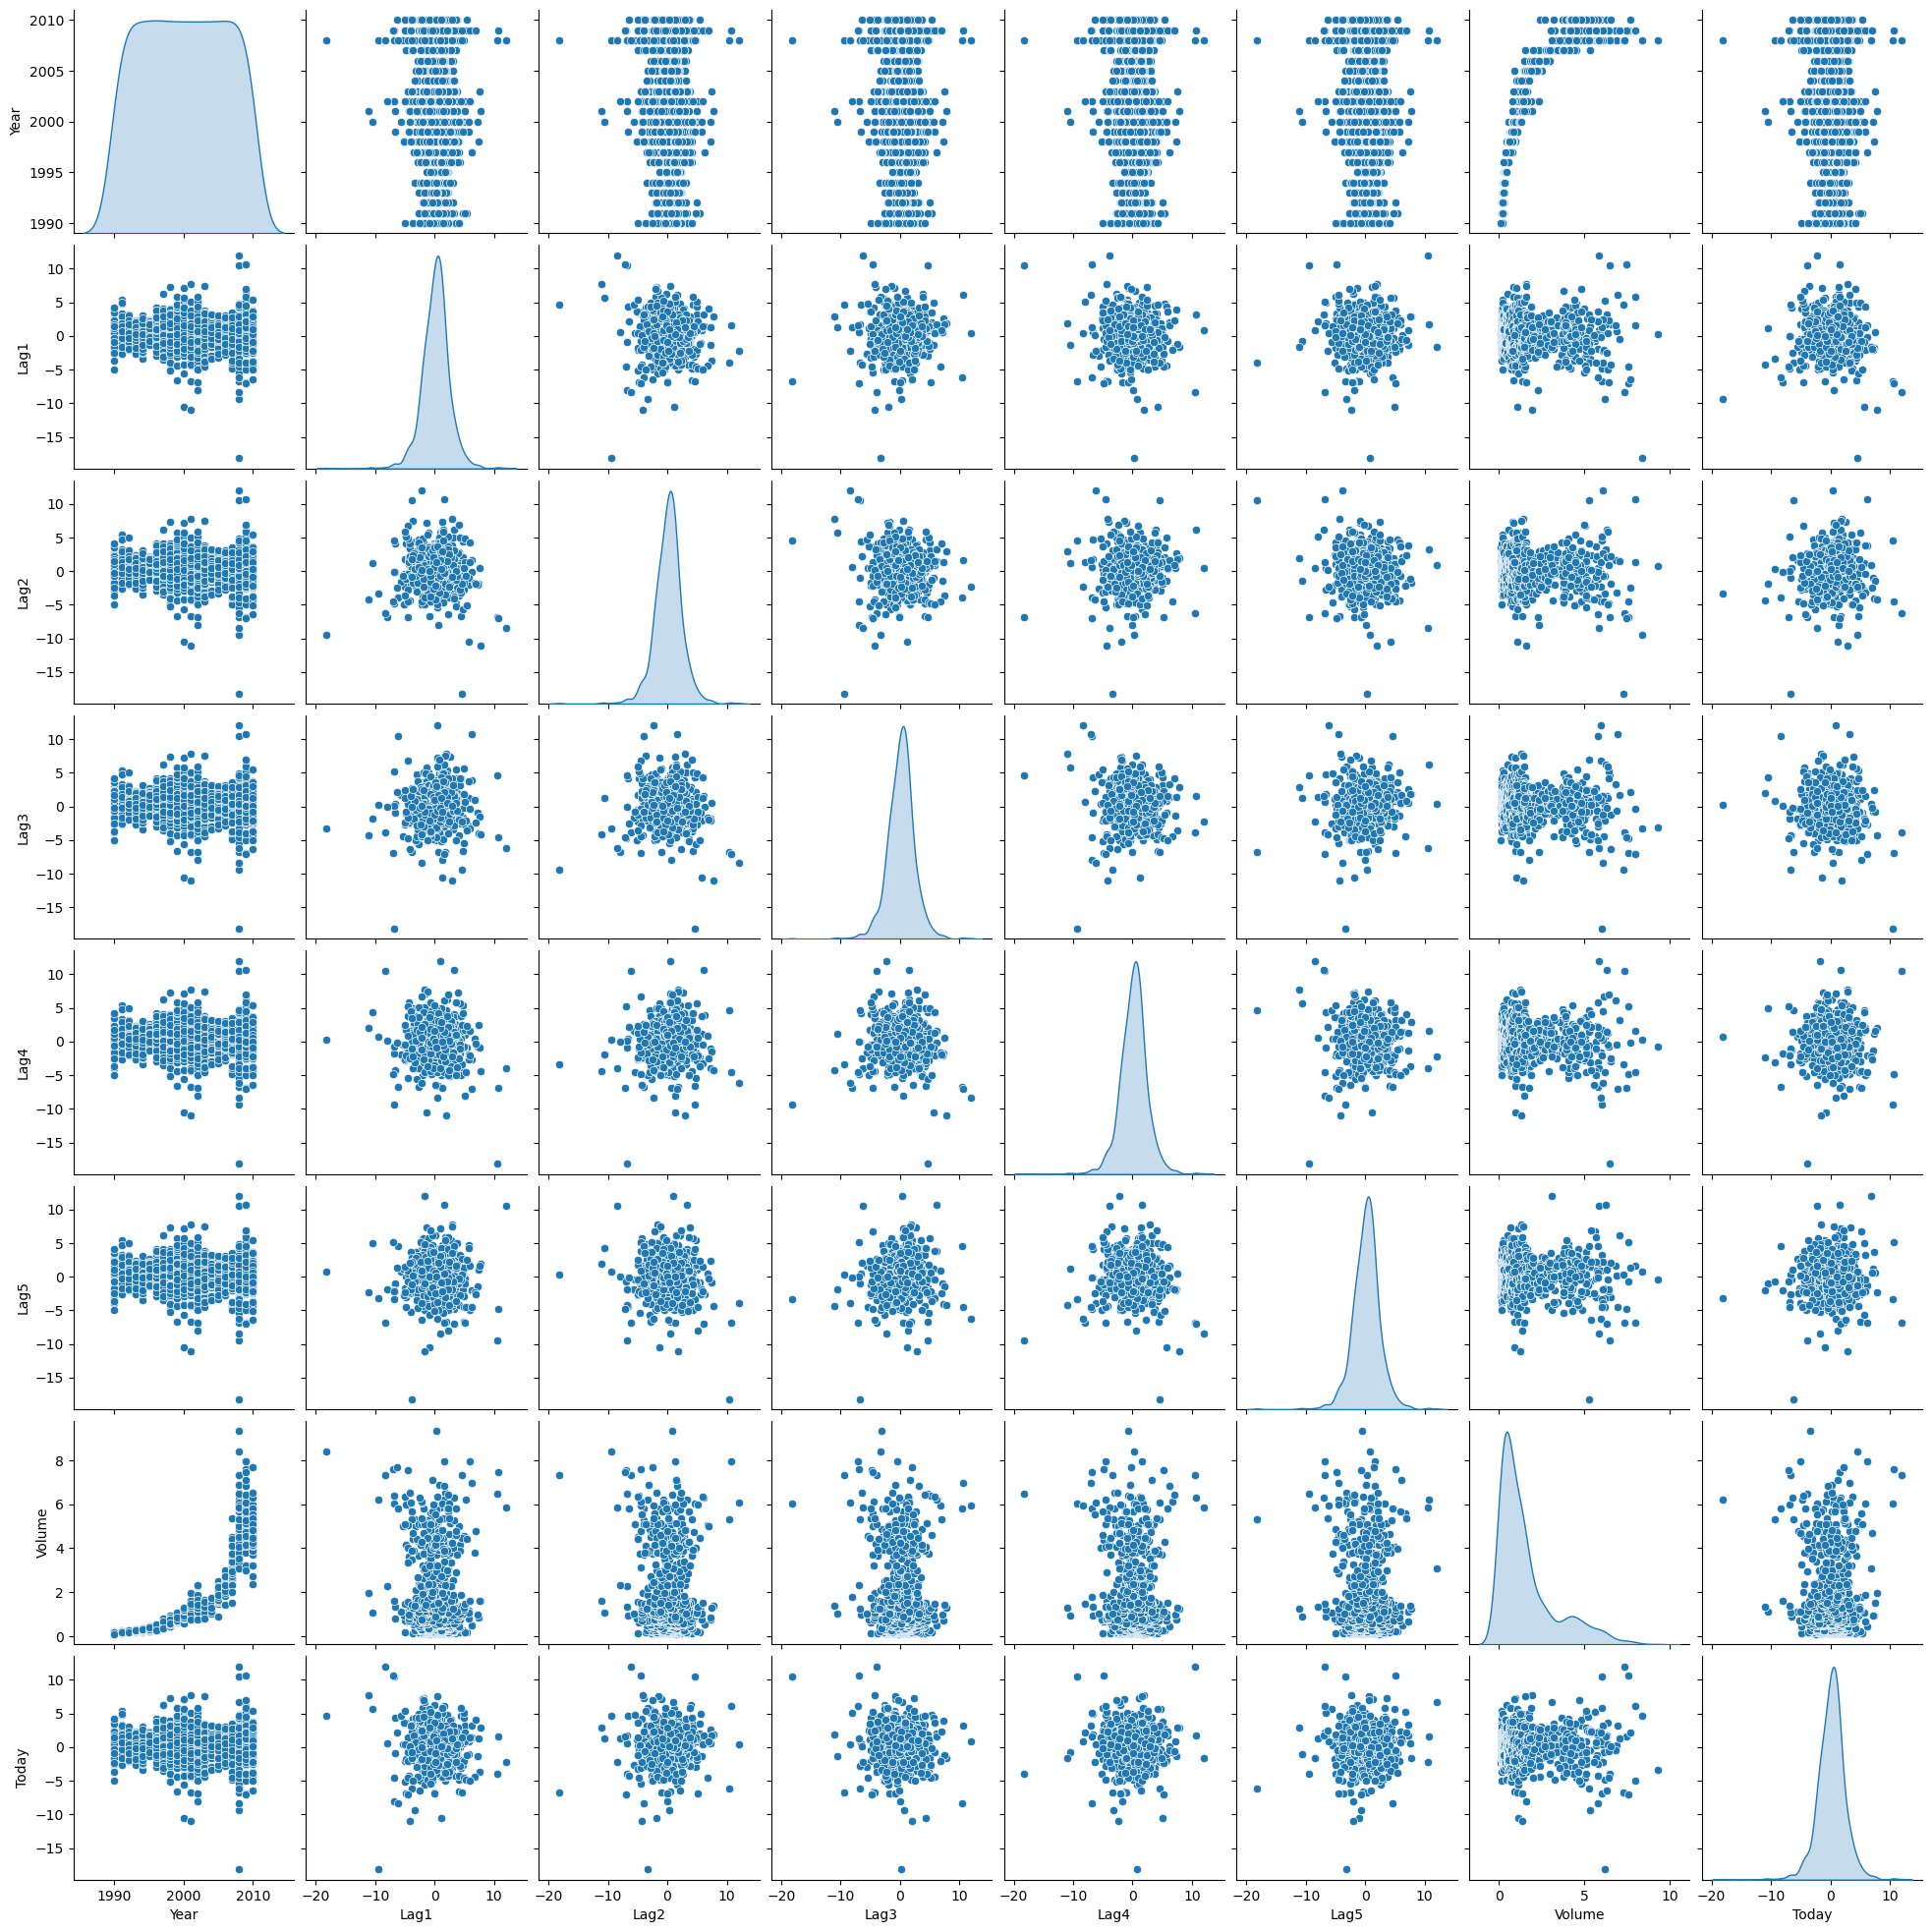

In [5]:
sns.pairplot(Weekly,diag_kind='kde');

In [6]:
Weekly.describe()

Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680     0.241000  
75%       1.405000     2.053727     1.405000  
max      12.026000     9.328214    12.026000

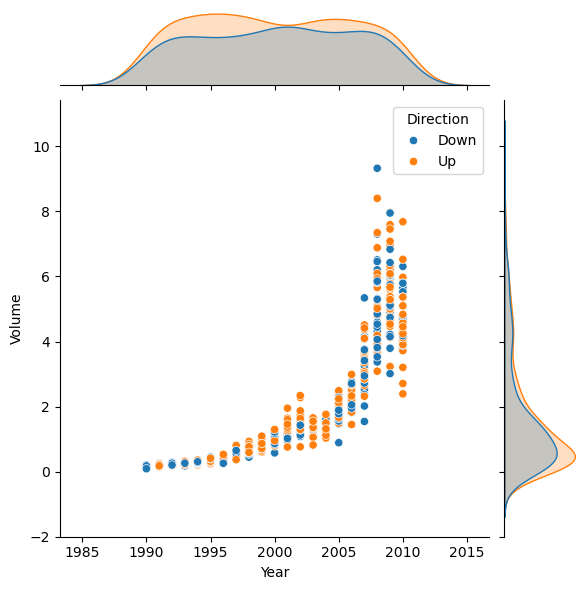

In [7]:
sns.jointplot(Weekly,x="Year",y="Volume",kind='scatter',hue="Direction")

In [8]:
y=Weekly['Direction']
idx=Weekly.columns.drop(['Direction','Year','Today'])
X=Weekly[idx]
lda=LDA(store_covariance=True)
results=lda.fit(X,y)
results.coef_ , results.intercept_

(array([[-0.04096028,  0.05745563, -0.0153048 , -0.02714788, -0.0138834 ,
         -0.02342819]]),
 array([0.2677009]))

In [9]:
X,y

(       Lag1   Lag2   Lag3   Lag4   Lag5    Volume
 0     0.816  1.572 -3.936 -0.229 -3.484  0.154976
 1    -0.270  0.816  1.572 -3.936 -0.229  0.148574
 2    -2.576 -0.270  0.816  1.572 -3.936  0.159837
 3     3.514 -2.576 -0.270  0.816  1.572  0.161630
 4     0.712  3.514 -2.576 -0.270  0.816  0.153728
 ...     ...    ...    ...    ...    ...       ...
 1084 -0.861  0.043 -2.173  3.599  0.015  3.205160
 1085  2.969 -0.861  0.043 -2.173  3.599  4.242568
 1086  1.281  2.969 -0.861  0.043 -2.173  4.835082
 1087  0.283  1.281  2.969 -0.861  0.043  4.454044
 1088  1.034  0.283  1.281  2.969 -0.861  2.707105
 
 [1089 rows x 6 columns],
 0       Down
 1       Down
 2         Up
 3         Up
 4         Up
         ... 
 1084      Up
 1085      Up
 1086      Up
 1087      Up
 1088      Up
 Name: Direction, Length: 1089, dtype: object)

In [10]:
log_reg=LogisticRegression(penalty=None)
log_reg.fit(X,y)

print(log_reg.classes_,log_reg.coef_,log_reg.intercept_)

prob=log_reg.predict_proba(X) # Two columns signify prob of being in class 1 or class 2
prob =np.where(prob[:,1] >= 0.5, 'Up','Down')

print(np.mean(prob == np.array(y)))
confusion_table(prob,y)

['Down' 'Up'] [[-0.04126267  0.0584296  -0.01605178 -0.02780586 -0.01446438 -0.02277109]] [0.26690939]
0.5610651974288338


Truth      Down   Up
Predicted           
Down         54   48
Up          430  557

In [11]:
X=Weekly[idx]
X.insert(loc=0,column="Intercept",value=1)
X

Intercept   Lag1   Lag2   Lag3   Lag4   Lag5    Volume
0             1  0.816  1.572 -3.936 -0.229 -3.484  0.154976
1             1 -0.270  0.816  1.572 -3.936 -0.229  0.148574
2             1 -2.576 -0.270  0.816  1.572 -3.936  0.159837
3             1  3.514 -2.576 -0.270  0.816  1.572  0.161630
4             1  0.712  3.514 -2.576 -0.270  0.816  0.153728
...         ...    ...    ...    ...    ...    ...       ...
1084          1 -0.861  0.043 -2.173  3.599  0.015  3.205160
1085          1  2.969 -0.861  0.043 -2.173  3.599  4.242568
1086          1  1.281  2.969 -0.861  0.043 -2.173  4.835082
1087          1  0.283  1.281  2.969 -0.861  0.043  4.454044
1088          1  1.034  0.283  1.281  2.969 -0.861  2.707105

[1089 rows x 7 columns]

In [12]:
y=Weekly["Direction"]
y.value_counts()

Direction
Up      605
Down    484
Name: count, dtype: int64

In [13]:
y_mod=y.map({'Up':1,'Down':0})
y_mod
result=sm.Logit(y_mod,X).fit()
result.summary()
#the below method uses  dmatrices library
# y, X = dmatrices('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=Weekly, return_type='dataframe')
# y,X

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sat, 14 Sep 2024   Pseudo R-squ.:                0.006580
Time:                        00:29:21   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

In [14]:
label=np.array(['Down']*y.shape[0])
label[result.predict() >=0.5] = 'Up'
print("Overall fraction of correct predictions =",np.mean(label == np.array(y)))
print("Overall fraction of correct predictions (log_reg) =",
      log_reg.score(X.drop(columns='Intercept'),y))
print(result.pred_table()) #in statsmodels is effectively 
#equivalent to a confusion matrix but in the context of logistic regression.
print(y.value_counts())
confusion_table(label,y)

Overall fraction of correct predictions = 0.5610651974288338
Overall fraction of correct predictions (log_reg) = 0.5610651974288338
[[ 54. 430.]
 [ 48. 557.]]
Direction
Up      605
Down    484
Name: count, dtype: int64


Truth      Down   Up
Predicted           
Down         54   48
Up          430  557

In [123]:
train=(Weekly['Year'] >= 1990) & (Weekly['Year'] <=2008)
print(train.value_counts())
X_train,y_train,X_test,y_test=Weekly[train]['Lag2'],Weekly["Direction"][train],\
Weekly[~train]['Lag2'],Weekly["Direction"][~train]
X_train=np.array(X_train).reshape(X_train.shape[0],1)
X_test=np.array(X_test).reshape(X_test.shape[0],1)
# y_train=np.array(y_train).reshape(y_train.shape[0],1)
X_train.shape,y_train.shape,X_test.shape,y_test.shape,y_test.value_counts()

Year
True     985
False    104
Name: count, dtype: int64


((985, 1),
 (985,),
 (104, 1),
 (104,),
 Direction
 Up      61
 Down    43
 Name: count, dtype: int64)

In [16]:
log_reg=LogisticRegression(C=1e30,solver='liblinear')
log_reg.fit(X_train,y_train)
print(log_reg.classes_,log_reg.coef_,log_reg.intercept_)
pred=log_reg.predict(X_test)
print("Overall fraction of correct predictions (log_reg) =",log_reg.score(X_test,y_test))
np.mean(pred == y_test)
print("\n")
print(confusion_table(pred,y_test))
print("\n")
sklearn.metrics.confusion_matrix(y_test,pred).T

['Down' 'Up'] [[0.05809433]] [0.20325694]
Overall fraction of correct predictions (log_reg) = 0.625


Truth      Down  Up
Predicted          
Down          9   5
Up           34  56




array([[ 9,  5],
       [34, 56]], dtype=int64)

In [17]:
lda=LDA(store_covariance=True)
lda.fit(X_train,y_train)
print(lda.classes_,lda.coef_,lda.intercept_)
print("Overall fraction of correct predictions (lda) =",lda.score(X_test,y_test))
confusion_table(lda.predict(X_test),y_test)

['Down' 'Up'] [[0.05768451]] [0.203424]
Overall fraction of correct predictions (lda) = 0.625


Truth      Down  Up
Predicted          
Down          9   5
Up           34  56

In [102]:
qda=QDA(store_covariance=True)
qda.fit(X_train,y_train)
print(qda.classes_ , qda.covariance_, qda.means_, )
print("Overall fraction of correct predictions (qda) =",qda.score(X_test,y_test))
confusion_table(qda.predict(X_test),y_test)

['Down' 'Up'] [array([[4.83781758]]), array([[5.37073888]])] [[-0.03568254]
 [ 0.26036581]]
Overall fraction of correct predictions (qda) = 0.5865384615384616


Truth      Down  Up
Predicted          
Down          0   0
Up           43  61

In [19]:
knn_1=KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train,y_train)
print(knn_1.classes_,knn_1.algorithm)
print("Overall fraction of correct predictions (knn_1) =",knn_1.score(X_test,y_test))
confusion_table(knn_1.predict(X_train),y_train)

['Down' 'Up'] auto
Overall fraction of correct predictions (knn_1) = 0.5096153846153846


Truth      Down   Up
Predicted           
Down        415   17
Up           26  527

In [23]:
NB=GaussianNB()
NB.fit(X_train,y_train)
print(NB.classes_,NB.theta_)
print("Overall fraction of correct predictions (knn_1) =",NB.score(X_test,y_test))
confusion_table(NB.predict(X_test),y_test)

['Down' 'Up'] [[-0.03568254]
 [ 0.26036581]]
Overall fraction of correct predictions (knn_1) = 0.5865384615384616


Truth      Down  Up
Predicted          
Down          0   0
Up           43  61

In [34]:
for n in range(3,7):
    knn_n=KNeighborsClassifier(n_neighbors=n)
    knn_n.fit(X_train,y_train).predict(X_test)
    print(f"Overall fraction of correct predictions (knn_{n}) = {knn_n.score(X_test,y_test)}")

Overall fraction of correct predictions (knn_3) = 0.5480769230769231
Overall fraction of correct predictions (knn_4) = 0.5769230769230769
Overall fraction of correct predictions (knn_5) = 0.5384615384615384
Overall fraction of correct predictions (knn_6) = 0.5096153846153846


In [39]:
train=(Weekly['Year'] >= 1990) & (Weekly['Year'] <=2008)
X_train,y_train,X_test,y_test=Weekly[train][['Lag1','Lag2']],Weekly["Direction"][train],\
Weekly[~train][['Lag1','Lag2']],Weekly["Direction"][~train]
X_train.shape,y_train.shape,X_test.shape,y_test.shape,y_test.value_counts()

((985, 2),
 (985,),
 (104, 2),
 (104,),
 Direction
 Up      61
 Down    43
 Name: count, dtype: int64)

### modelling interactions

In [113]:
qda=QDA(store_covariance=True)
qda.fit(X_test,y_test).predict(X_train)
qda.covariance_,qda.classes_,qda.score(X_test,y_test)
confusion_table(qda.predict(X_test),y_test)

Truth      Down  Up
Predicted          
Down          9   4
Up           34  57

In [110]:
Y=np.where(Weekly["Direction"] == 'Down',0,1)
model=MS(['Lag1','Lag2',('Lag1','Lag2')]).fit(Weekly)
X=model.transform(Weekly)
X_train,y_train,X_test,y_test=X.loc[train],Y[train],X.loc[~train],Y[~train]
result=sm.GLM(y_train,X_train,family=sm.families.Binomial()).fit()
labels=np.where(result.predict(exog=X_test) >= 0.5, 1,0)
confusion_table(labels,y_test)

Truth       0   1
Predicted        
0           7   8
1          36  53

In [122]:
model=MS([poly('Lag1',degree=2),poly('Lag2',degree=2),('Lag1','Lag2')]).fit(Weekly)
X=model.transform(Weekly)
X_train,y_train,X_test,y_test=X.loc[train],Y[train],X.loc[~train],Y[~train]
result=sm.GLM(y_train,X_train,family=sm.families.Binomial()).fit()
labels=np.where(result.predict(exog=X_test) >= 0.5, 1,0)
print(confusion_table(labels,y_test))
result.summary()

Truth       0   1
Predicted        
0           6   9
1          37  52


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  985
Model:                            GLM   Df Residuals:                      979
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -672.68
Date:                Sat, 14 Sep 2024   Deviance:                       1345.4
Time:                        02:02:58   Pearson chi2:                     985.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.009451
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                   0.2177      0.065      3.361      0.001       0.091       0.345
poly(Lag1, degree=2)[0]    -3.8010      2.417     -1.573      0.116      -8.538       0.936
poly(Lag1, degree=2)[1]     0.4078      2.791      0.146      0.884      -5.062       5.877
poly(Lag2, degree=2)[0]     4.3654      2.379      1.835      0.067      -0.298       9.028
poly(Lag2, degree=2)[1]     2.8560      2.580      1.107      0.268      -2.200       7.912
Lag1:Lag2                   0.0049      0.009      0.564      0.573      -0.012       0.022
===========================================================================================
"""

In [128]:
Weekly

Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0     1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1     1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2     1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3     1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4     1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up
...    ...    ...    ...    ...    ...    ...       ...    ...       ...
1084  2010 -0.861  0.043 -2.173  3.599  0.015  3.205160  2.969        Up
1085  2010  2.969 -0.861  0.043 -2.173  3.599  4.242568  1.281        Up
1086  2010  1.281  2.969 -0.861  0.043 -2.173  4.835082  0.283        Up
1087  2010  0.283  1.281  2.969 -0.861  0.043  4.454044  1.034        Up
1088  2010  1.034  0.283  1.281  2.969 -0.861  2.707105  0.069        Up

[1089 rows x 9 columns]

In [139]:
poly_f=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_f.fit_transform(Weekly[['Lag1','Lag2']])
X_poly=pd.DataFrame(X_poly,columns=['Lag1','Lag2','Lag1**2','Lag1*Lag2','Lag2**2'])
X_train,X_test=X_poly.loc[train],X_poly.loc[~train]
lda=LDA(store_covariance=True)
lda.fit(X_train,y_train)
print(lda.classes_,lda.intercept_,lda.coef_,lda.covariance_,lda.means_,lda.score(X_test,y_test))
confusion_table(lda.predict(X_test),y_test)

['Down' 'Up'] [0.1841892] [[-0.04769038  0.05900367  0.00026066  0.00412556  0.00514182]] [[  5.12264985  -0.42984076  -6.16098485  -7.87760234   1.1119505 ]
 [ -0.42984076   5.12177761  -8.66628472   1.71723446  -6.23929134]
 [ -6.16098485  -8.66628472 230.27520406  35.70679283  70.79456275]
 [ -7.87760234   1.71723446  35.70679283  97.17446818 -44.04537252]
 [  1.1119505   -6.23929134  70.79456275 -44.04537252 230.21918781]] [[ 0.28944444 -0.03568254  4.9643968  -0.80144947  4.82812072]
 [-0.00921324  0.26036581  5.31894013 -0.1393632   5.42865655]] 0.5576923076923077


Truth      Down  Up
Predicted          
Down          6   9
Up           37  52

In [140]:
qda=QDA(store_covariance=True)
qda.fit(X_train,y_train)
print(qda.classes_,qda.covariance_,qda.means_,qda.score(X_test,y_test))
confusion_table(lda.predict(X_test),y_test)

['Down' 'Up'] [array([[  4.89171103,  -0.79291936,   4.69634428,  -6.67002366,
          4.54835982],
       [ -0.79291936,   4.83781758,  -6.7249811 ,   5.92034587,
        -13.57235453],
       [  4.69634428,  -6.7249811 , 135.72035404, -50.01781636,
         50.72011166],
       [ -6.67002366,   5.92034587, -50.01781636,  74.09951195,
        -91.98542602],
       [  4.54835982, -13.57235453,  50.72011166, -91.98542602,
        310.00262048]]), array([[ 5.32865056e+00, -1.37216622e-01, -1.49815130e+01,
        -8.88513425e+00, -1.66852132e+00],
       [-1.37216622e-01,  5.37073888e+00, -1.02712685e+01,
        -1.68227668e+00, -3.20195173e-01],
       [-1.49815130e+01, -1.02712685e+01,  3.07742395e+02,
         1.05302081e+02,  8.73219064e+01],
       [-8.88513425e+00, -1.68227668e+00,  1.05302081e+02,
         1.16230324e+02, -5.36115006e+00],
       [-1.66852132e+00, -3.20195173e-01,  8.73219064e+01,
        -5.36115006e+00,  1.66417582e+02]])] [[ 0.28944444 -0.03568254  4.9643968

Truth      Down  Up
Predicted          
Down          6   9
Up           37  52

# Question 14

In [194]:
Auto=ISLP.load_data('Auto')
Auto.reset_index(inplace=True)
Auto[:2]

name   mpg  cylinders  displacement  horsepower  \
0  chevrolet chevelle malibu  18.0          8         307.0         130   
1          buick skylark 320  15.0          8         350.0         165   

   weight  acceleration  year  origin  
0    3504          12.0    70       1  
1    3693          11.5    70       1

In [195]:
Auto["mpg01"]=np.where(Auto["mpg"] >= Auto["mpg"].median() ,1,0)
Auto

name   mpg  cylinders  displacement  horsepower  \
0    chevrolet chevelle malibu  18.0          8         307.0         130   
1            buick skylark 320  15.0          8         350.0         165   
2           plymouth satellite  18.0          8         318.0         150   
3                amc rebel sst  16.0          8         304.0         150   
4                  ford torino  17.0          8         302.0         140   
..                         ...   ...        ...           ...         ...   
387            ford mustang gl  27.0          4         140.0          86   
388                  vw pickup  44.0          4          97.0          52   
389              dodge rampage  32.0          4         135.0          84   
390                ford ranger  28.0          4         120.0          79   
391                 chevy s-10  31.0          4         119.0          82   

     weight  acceleration  year  origin  mpg01  
0      3504          12.0    70       1      0  
1      3693          11.5    70       1      0  
2      3436          11.0    70       1      0  
3      3433          12.0    70       1      0  
4      3449          10.5    70       1      0  
..      ...           ...   ...     ...    ...  
387    2790          15.6    82       1      1  
388    2130          24.6    82       2      1  
389    2295          11.6    82       1      1  
390    2625          18.6    82       1      1  
391    2720          19.4    82       1      1  

[392 rows x 10 columns]

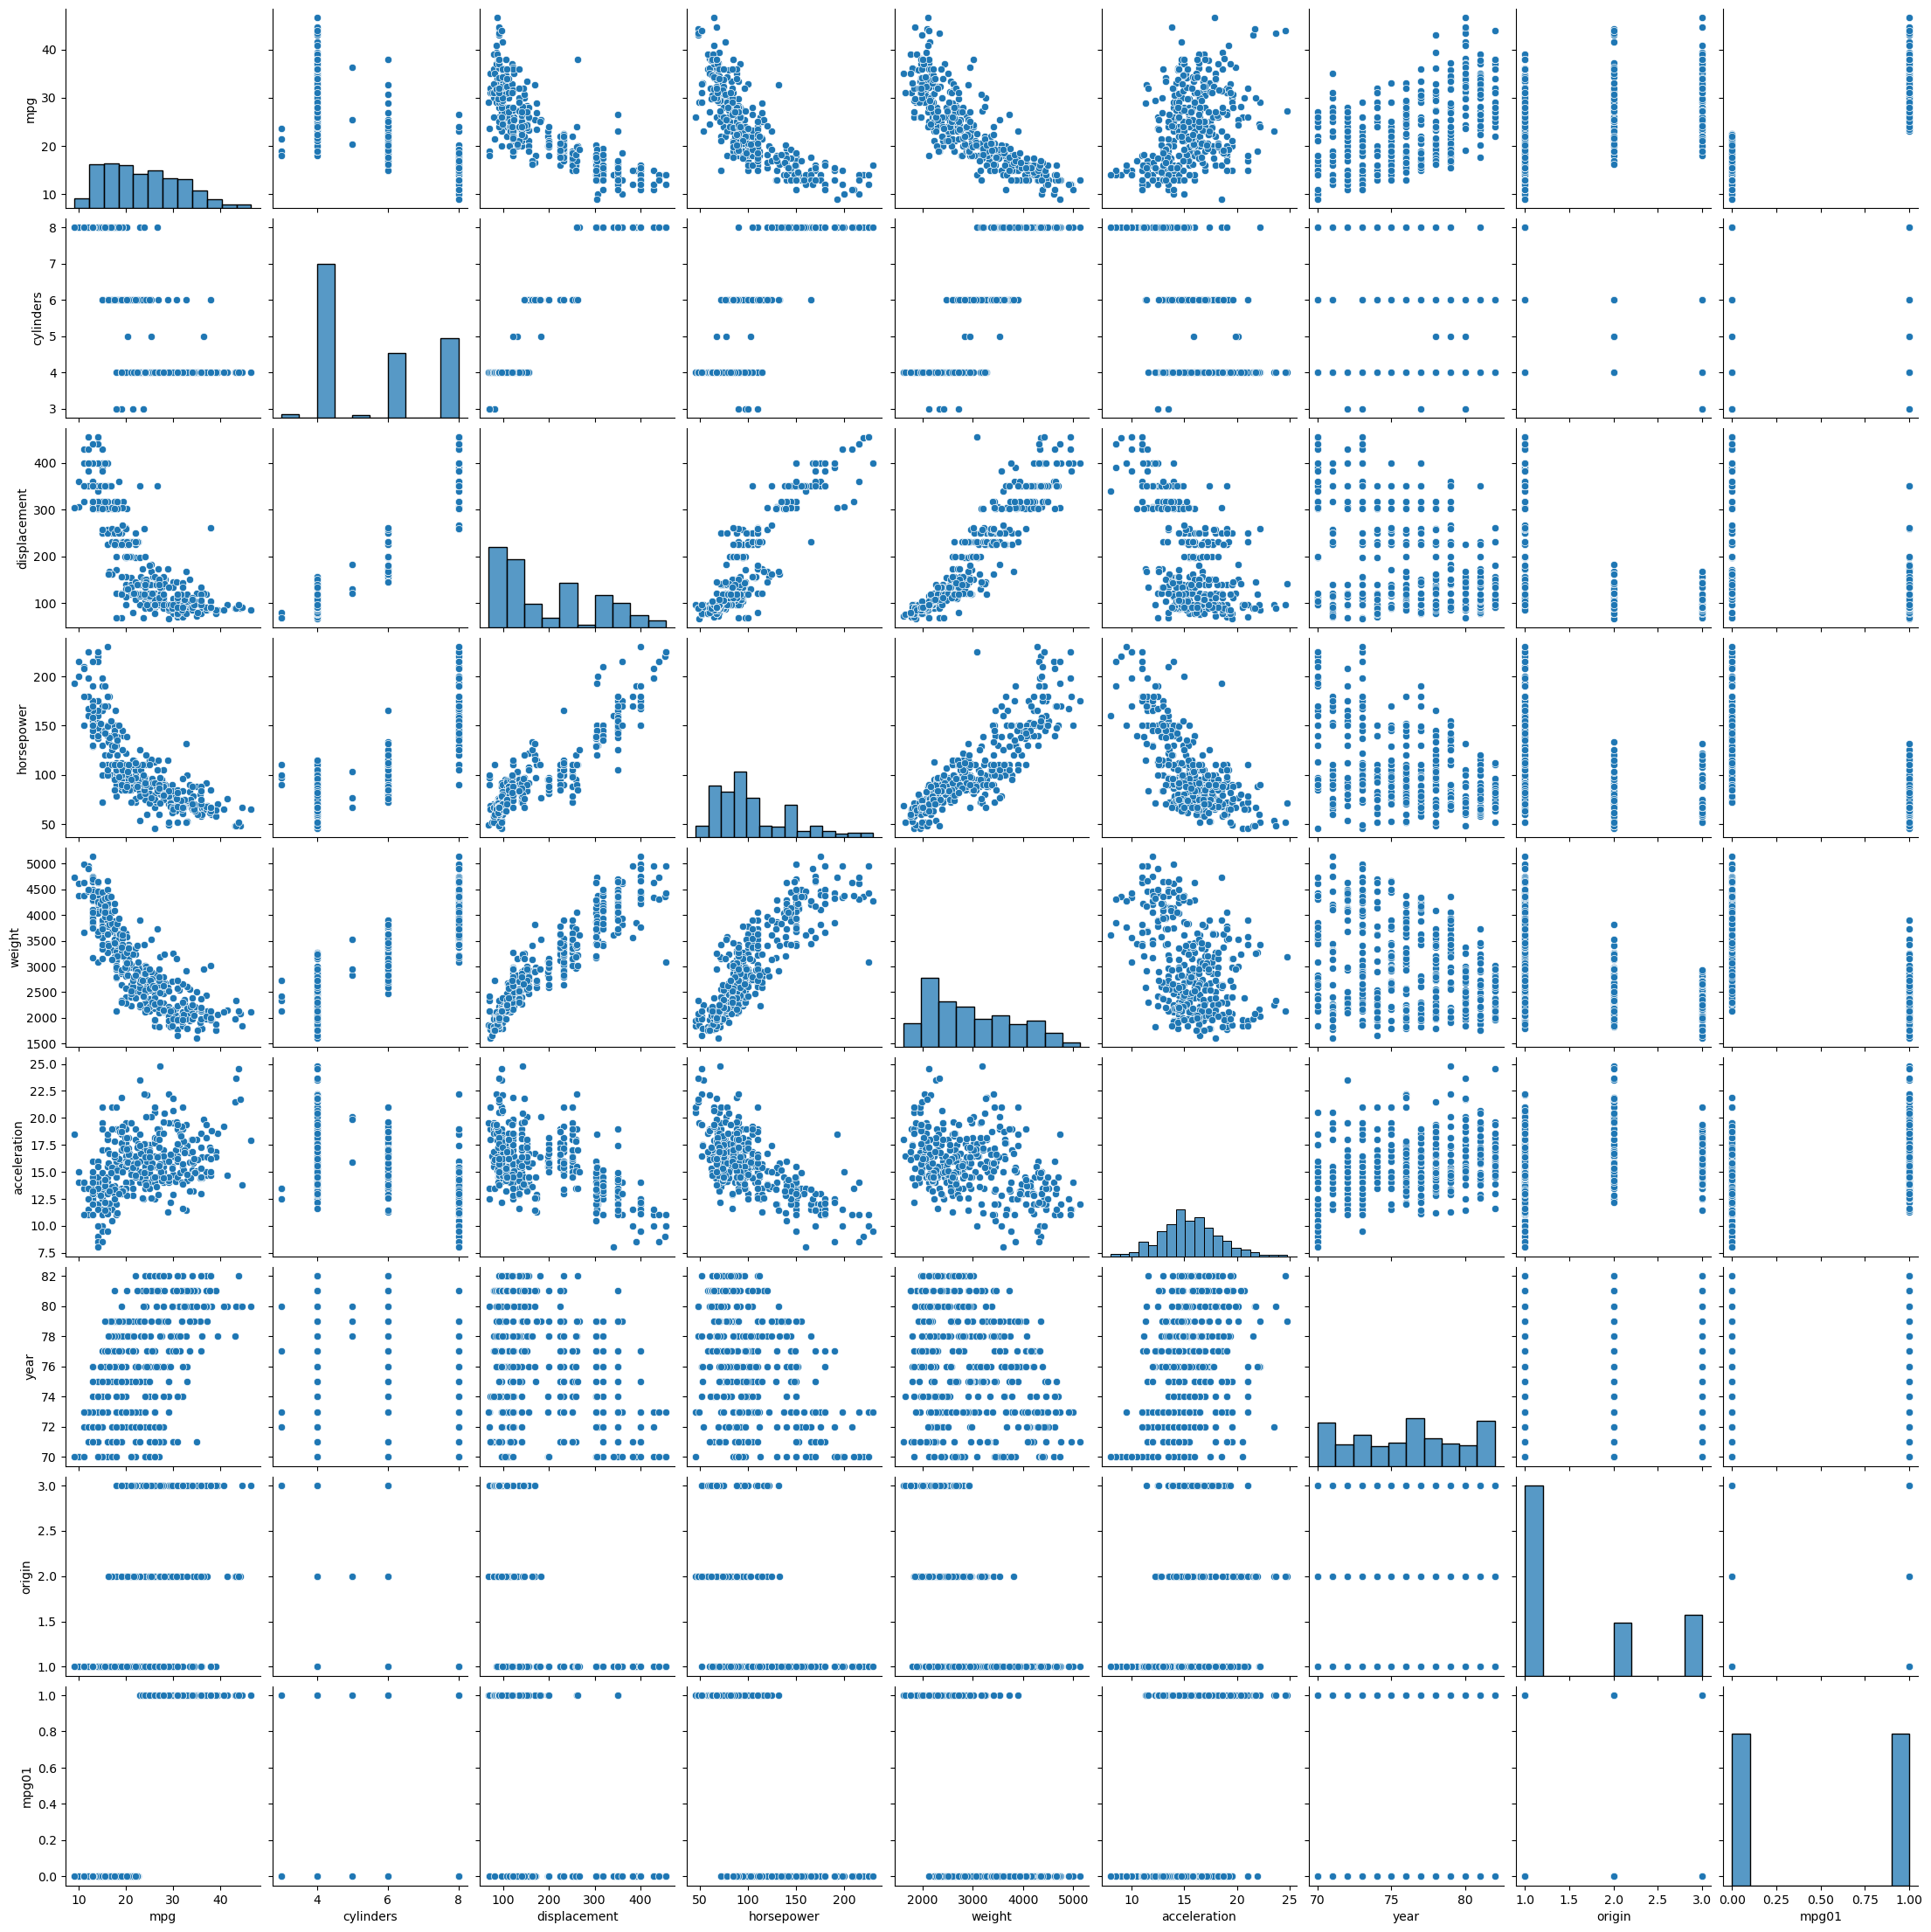

In [190]:
sns.pairplot(Auto);#.drop(columns="mpg"));

In [159]:
Auto.corr(numeric_only=True)

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   
mpg01         0.836939  -0.759194     -0.753477   -0.667053 -0.757757   

              acceleration      year    origin     mpg01  
mpg               0.423329  0.580541  0.565209  0.836939  
cylinders        -0.504683 -0.345647 -0.568932 -0.759194  
displacement     -0.543800 -0.369855 -0.614535 -0.753477  
horsepower       -0.689196 -0.416361 -0.455171 -0.667053  
weight           -0.416839 -0.309120 -0.585005 -0.757757  
acceleration      1.000000  0.290316  0.212746  0.346822  
year              0.290316  1.000000  0.181528  0.429904  
origin            0.212746  0.181528  1.000000  0.513698  
mpg01             0.346822  0.429904  0.513698  1.000000

In [196]:
idx=['cylinders','displacement','horsepower','weight','acceleration']
Auto_=Auto.loc[:,idx]
Auto_

cylinders  displacement  horsepower  weight  acceleration
0            8         307.0         130    3504          12.0
1            8         350.0         165    3693          11.5
2            8         318.0         150    3436          11.0
3            8         304.0         150    3433          12.0
4            8         302.0         140    3449          10.5
..         ...           ...         ...     ...           ...
387          4         140.0          86    2790          15.6
388          4          97.0          52    2130          24.6
389          4         135.0          84    2295          11.6
390          4         120.0          79    2625          18.6
391          4         119.0          82    2720          19.4

[392 rows x 5 columns]

In [200]:
train=np.where(Auto.index < 270, True, False)#np.arange(270)
train
X_train,y_train,X_test,y_test=Auto.iloc[train][idx],Auto.loc[train,"mpg01"],\
                                Auto_.iloc[~train][idx],Auto.iloc[~train]["mpg01"]
X_train

cylinders  displacement  horsepower  weight  acceleration
0            8         307.0         130    3504          12.0
1            8         350.0         165    3693          11.5
2            8         318.0         150    3436          11.0
3            8         304.0         150    3433          12.0
4            8         302.0         140    3449          10.5
..         ...           ...         ...     ...           ...
265          4         134.0          95    2560          14.2
266          4         119.0          97    2300          14.7
267          4         105.0          75    2230          14.5
268          4         134.0          95    2515          14.8
269          4         156.0         105    2745          16.7

[270 rows x 5 columns]

In [204]:
X_train,X_test,y_train,y_test=train_test_split(Auto[idx]
                                              ,Auto['mpg01'],test_size=0.3)
X_train.shape

(274, 5)

<Axes: xlabel='mpg01', ylabel='displacement'>

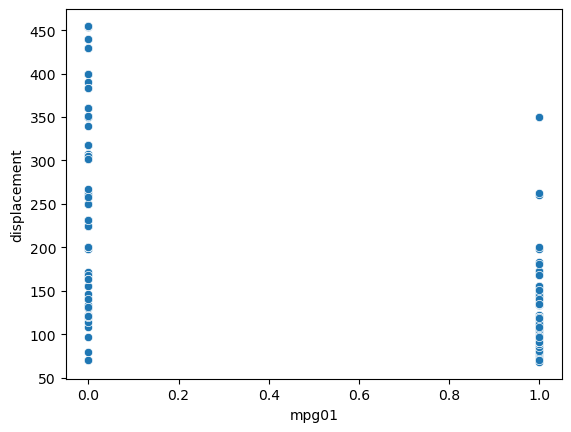

In [189]:
sns.scatterplot(Auto,x="mpg01",y="displacement")

In [233]:
lda=LDA()
lda.fit(X_train,y_train)
print(lda.classes_,lda.coef_,lda.intercept_)
print("Overall fraction of correct predictions (lda) =",lda.score(X_test,y_test))
print(f"Test Error Rate for Naive Bayes = {round(1-lda.score(X_test,y_test),2)}")
print(f"accuracy score = {accuracy_score(y_test,lda.predict(X_test))}")
confusion_table(lda.predict(X_test),y_test)

[0 1] [[-1.4247476  -0.02230056  0.03139623 -0.00177561 -0.16138603]] [16.64003523]
Overall fraction of correct predictions (lda) = 0.847457627118644
Test Error Rate for Naive Bayes = 0.15
accuracy score = 0.847457627118644


Truth       0   1
Predicted        
0          42   6
1          12  58

In [230]:
qda=QDA()
qda.fit(X_train,y_train)
print(qda.classes_)
print("Overall fraction of correct predictions (lda) =",qda.score(X_test,y_test))
print(f"Test Error Rate for Naive Bayes = {round(1-qda.score(X_test,y_test),2)}")
confusion_table(qda.predict(X_test),y_test)

[0 1]
Overall fraction of correct predictions (lda) = 0.864406779661017
Test Error Rate for Naive Bayes = 0.14


Truth       0   1
Predicted        
0          45   7
1           9  57

In [229]:
log_reg=LogisticRegression(C=1e10,solver='liblinear')
log_reg.fit(X_train,y_train)
print(log_reg.classes_,log_reg.coef_,log_reg.intercept_)
print("Overall fraction of correct predictions (lda) =",round(log_reg.score(X_test,y_test),2))
print(f"Test Error Rate for Naive Bayes = {round(1-log_reg.score(X_test,y_test),2)}")
confusion_table(log_reg.predict(X_test),y_test)

[0 1] [[ 0.21764097 -0.03608263  0.03607541 -0.00190564  0.42137317]] [0.15369526]
Overall fraction of correct predictions (lda) = 0.83
Test Error Rate for Naive Bayes = 0.17


Truth       0   1
Predicted        
0          42   8
1          12  56

In [228]:
NB=GaussianNB()
NB.fit(X_train,y_train)
print(NB.classes_,NB.epsilon_)#,NB.coef_,NB.intercept_)
print("Overall fraction of correct predictions (lda) =",round(NB.score(X_test,y_test),2))
print(f"Test Error Rate for Naive Bayes = {round(1-NB.score(X_test,y_test),2)}")
confusion_table(NB.predict(X_test),y_test)

[0 1] 0.000725703229474133
Overall fraction of correct predictions (lda) = 0.86
Test Error Rate for Naive Bayes = 0.14


Truth       0   1
Predicted        
0          44   7
1          10  57

In [236]:
for n in range(1,10):
    knn_n=KNeighborsClassifier(n_neighbors=n)
    knn_n.fit(X_train,y_train)#.predict(X_test)
    print(f"Overall fraction of correct predictions (knn_{n}) = {round(knn_n.score(X_test,y_test),2)}")
    print(f"test Error Rate for (knn_{n}) = {round(1-knn_n.score(X_test,y_test),2)}")

Overall fraction of correct predictions (knn_1) = 0.83
test Error Rate for (knn_1) = 0.17
Overall fraction of correct predictions (knn_2) = 0.79
test Error Rate for (knn_2) = 0.21
Overall fraction of correct predictions (knn_3) = 0.8
test Error Rate for (knn_3) = 0.2
Overall fraction of correct predictions (knn_4) = 0.81
test Error Rate for (knn_4) = 0.19
Overall fraction of correct predictions (knn_5) = 0.81
test Error Rate for (knn_5) = 0.19
Overall fraction of correct predictions (knn_6) = 0.82
test Error Rate for (knn_6) = 0.18
Overall fraction of correct predictions (knn_7) = 0.82
test Error Rate for (knn_7) = 0.18
Overall fraction of correct predictions (knn_8) = 0.82
test Error Rate for (knn_8) = 0.18
Overall fraction of correct predictions (knn_9) = 0.84
test Error Rate for (knn_9) = 0.16


# Question 15

In [241]:
def Power():
    print(2**3)
Power()
def Power2(x=1,a=1):
    print(x**a)
Power2(2,4)
def Power3(x=1,a=1):
    return(x**a)
Power3(2,4)

8
16


16

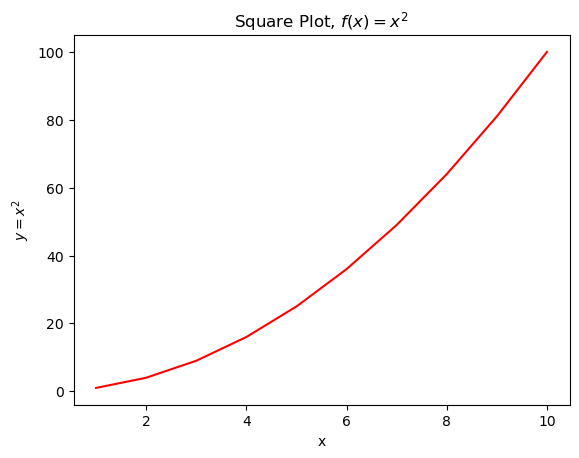

In [252]:
x=np.arange(1,11)
y=np.array([Power3(v,2) for v in x])
plt.plot(x,y,'r')
plt.title("Square Plot, $f(x)=x^2$")
plt.xlabel("x")
plt.ylabel("$y=x^2$");

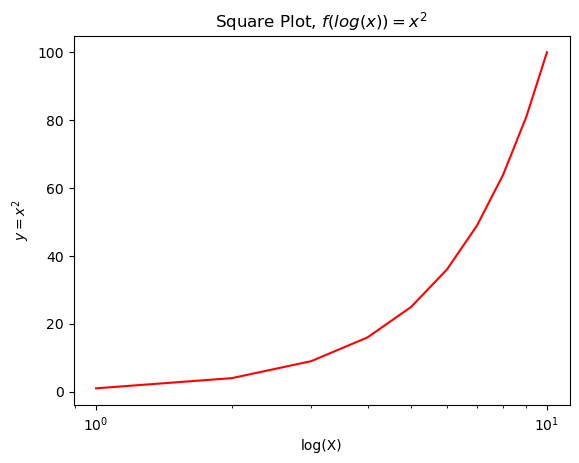

In [262]:
plt.plot(x,y,'r')
plt.xscale('log')
plt.title("Square Plot, $f(log(x))=x^2$")
plt.xlabel("log(X)")
plt.ylabel("$y=x^2$");

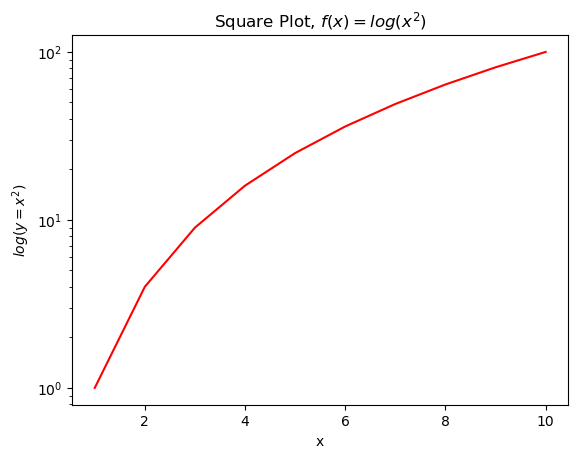

In [267]:
plt.plot(x,y,'r')
plt.yscale('log')
plt.title("Square Plot, $f(x)=log(x^2)$")
plt.xlabel("x")
plt.ylabel("$log(y=x^2)$");

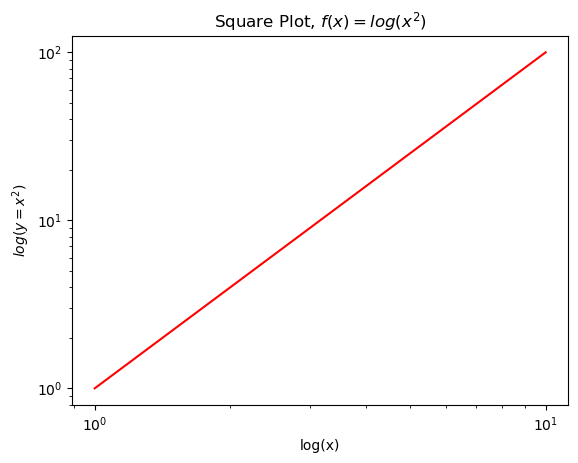

In [268]:
plt.plot(x,y,'r')
plt.xscale('log')
plt.yscale('log')
plt.title("Square Plot, $f(x)=log(x^2)$")
plt.xlabel("log(x)")
plt.ylabel("$log(y=x^2)$");

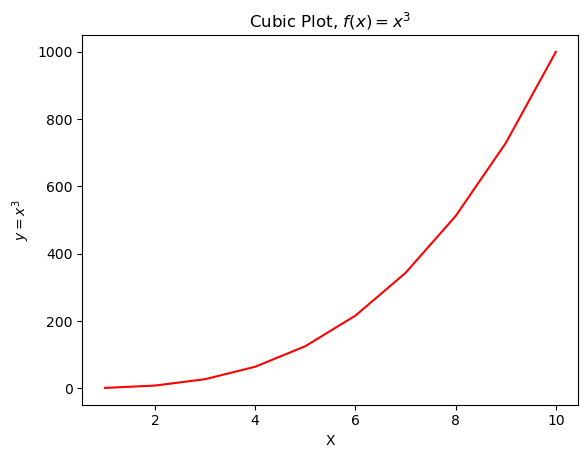

In [270]:
def PlotPower(x,a):
    y=np.array([Power3(v,a) for v in x])
    plt.plot(x,y,'r')
    plt.title("Cubic Plot, $f(x)=x^3$")
    plt.xlabel("X")
    plt.ylabel("$y=x^3$");
PlotPower(np.arange(1, 11), 3)

# Question 16

In [307]:
Boston=ISLP.load_data('Boston')
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


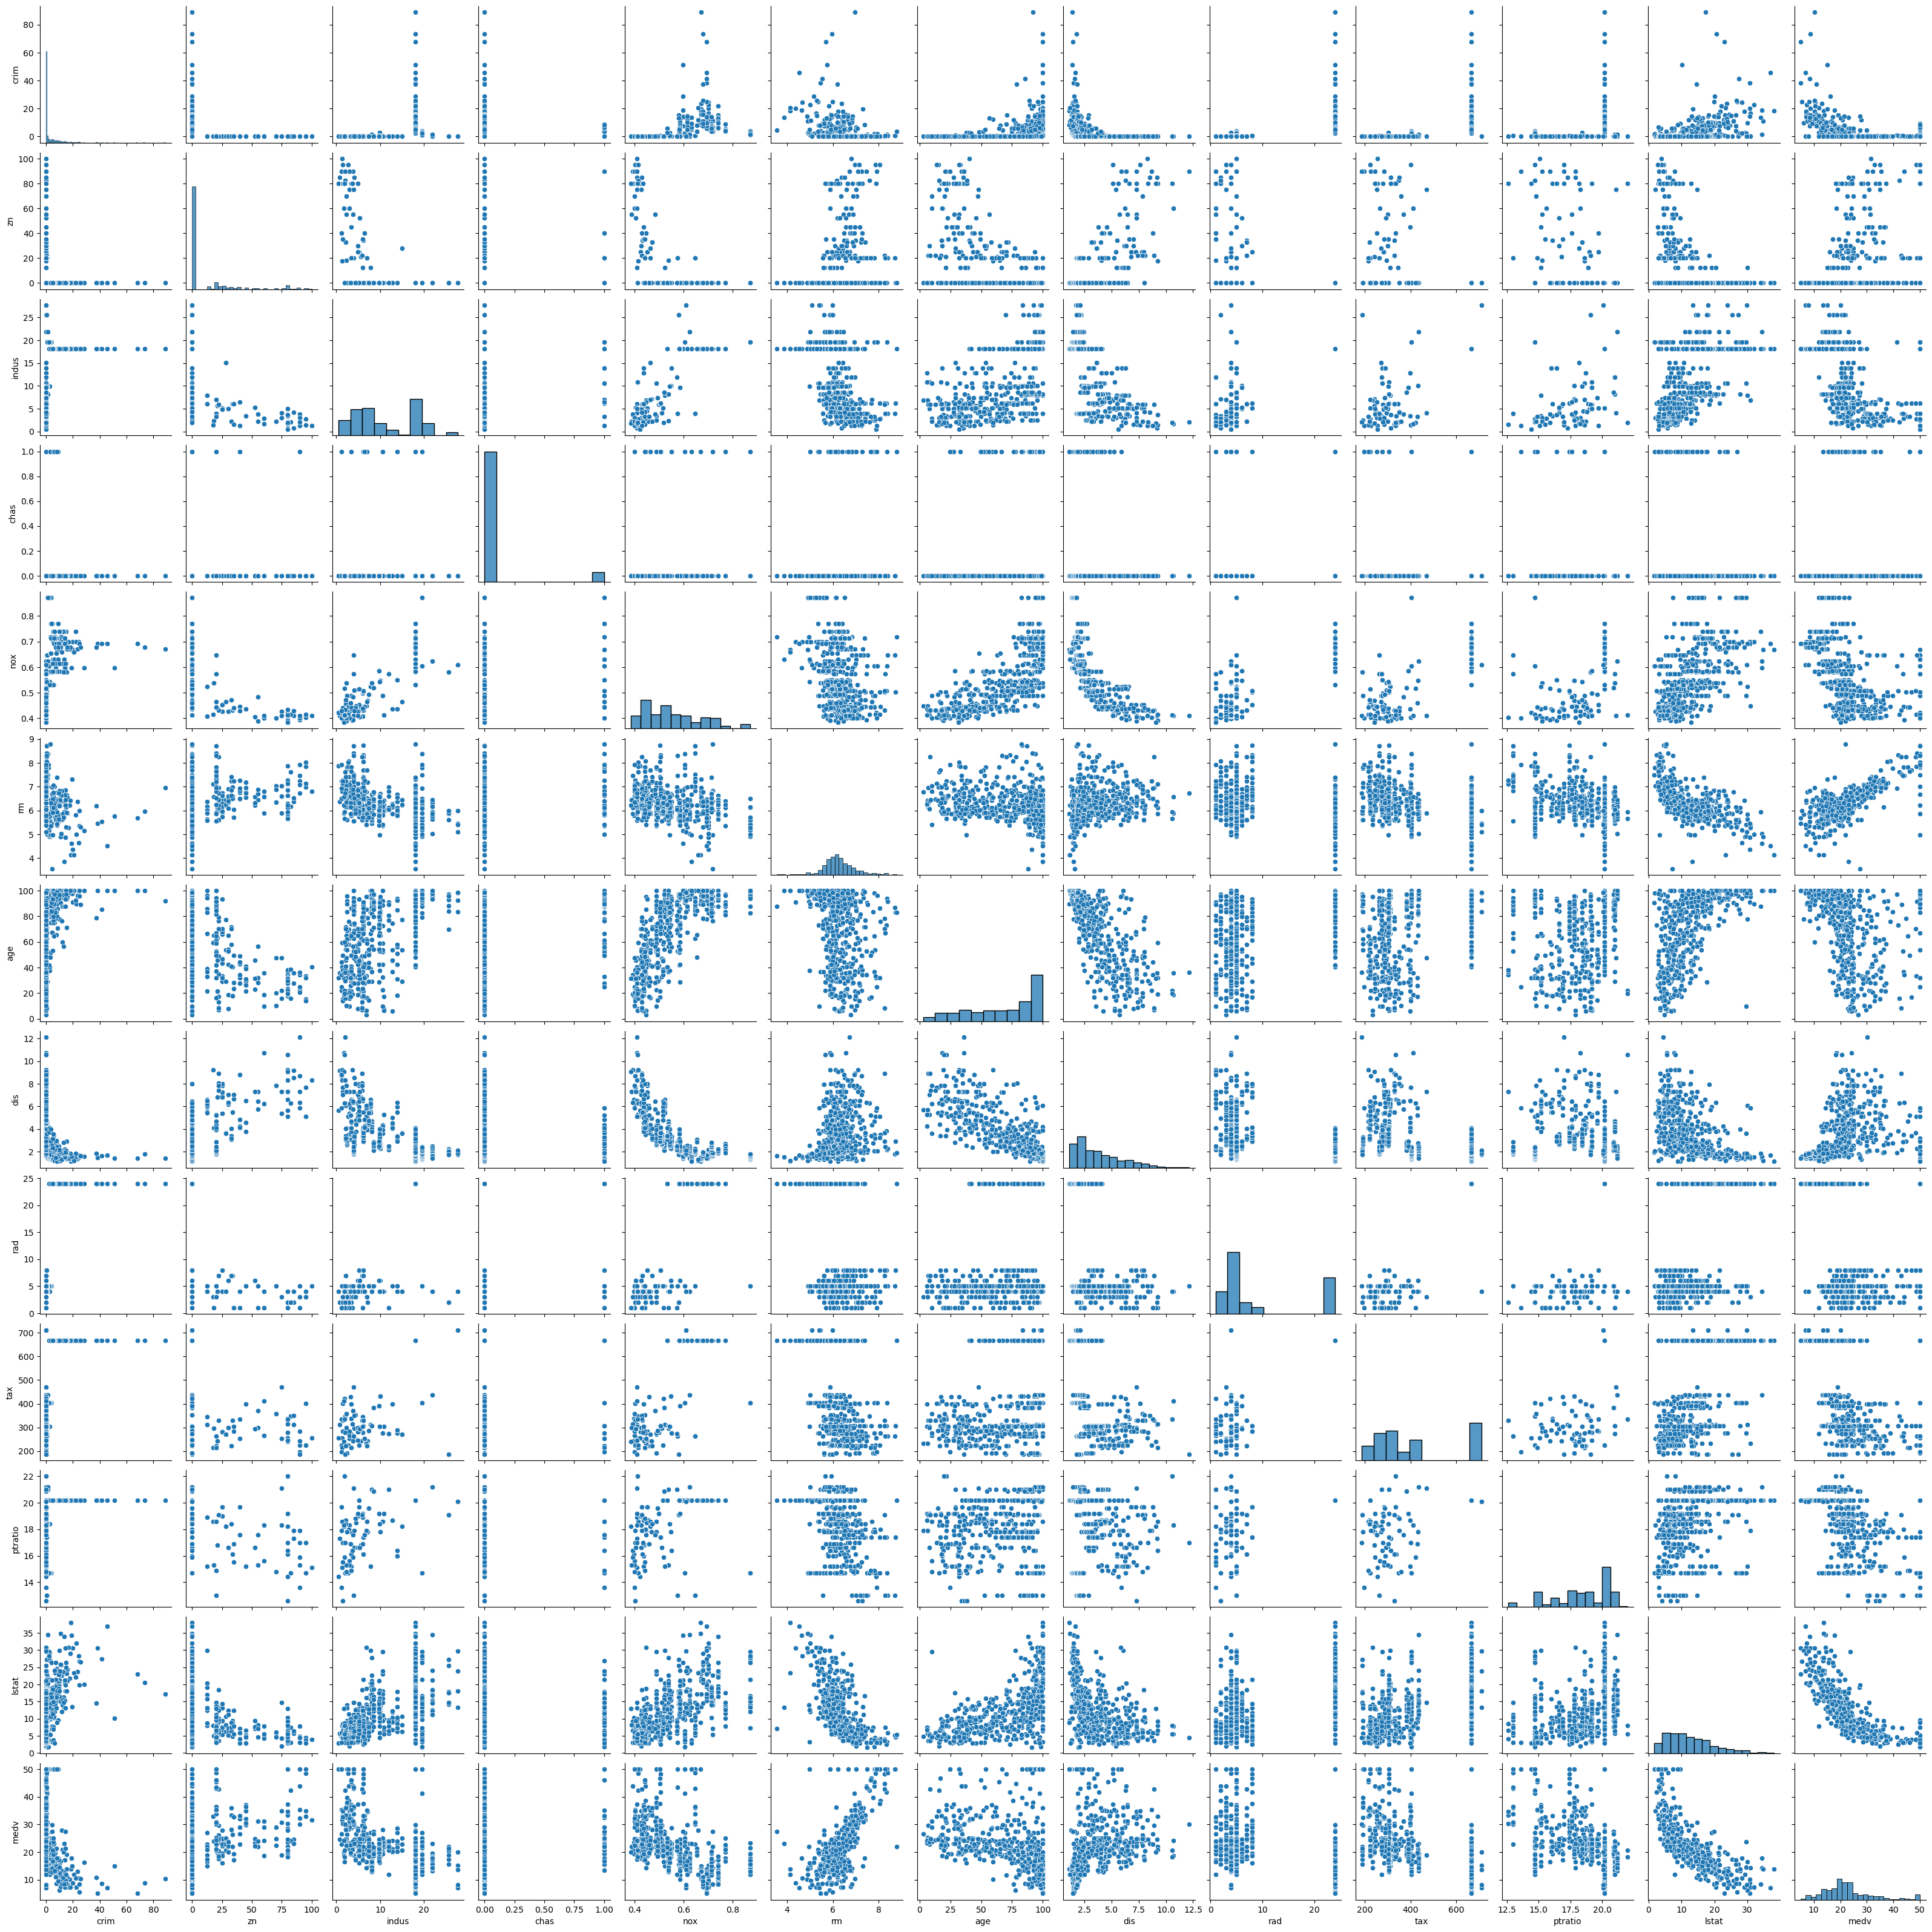

In [308]:
sns.pairplot(Boston);

In [309]:
Boston["crime_rate"]=np.where(Boston["crim"]>Boston["crim"].median(),1,0)
Boston.drop(columns="crim",inplace=True)

In [310]:
Boston[:2]

zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  lstat  \
0  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   4.98   
1   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   9.14   

   medv  crime_rate  
0  24.0           0  
1  21.6           0

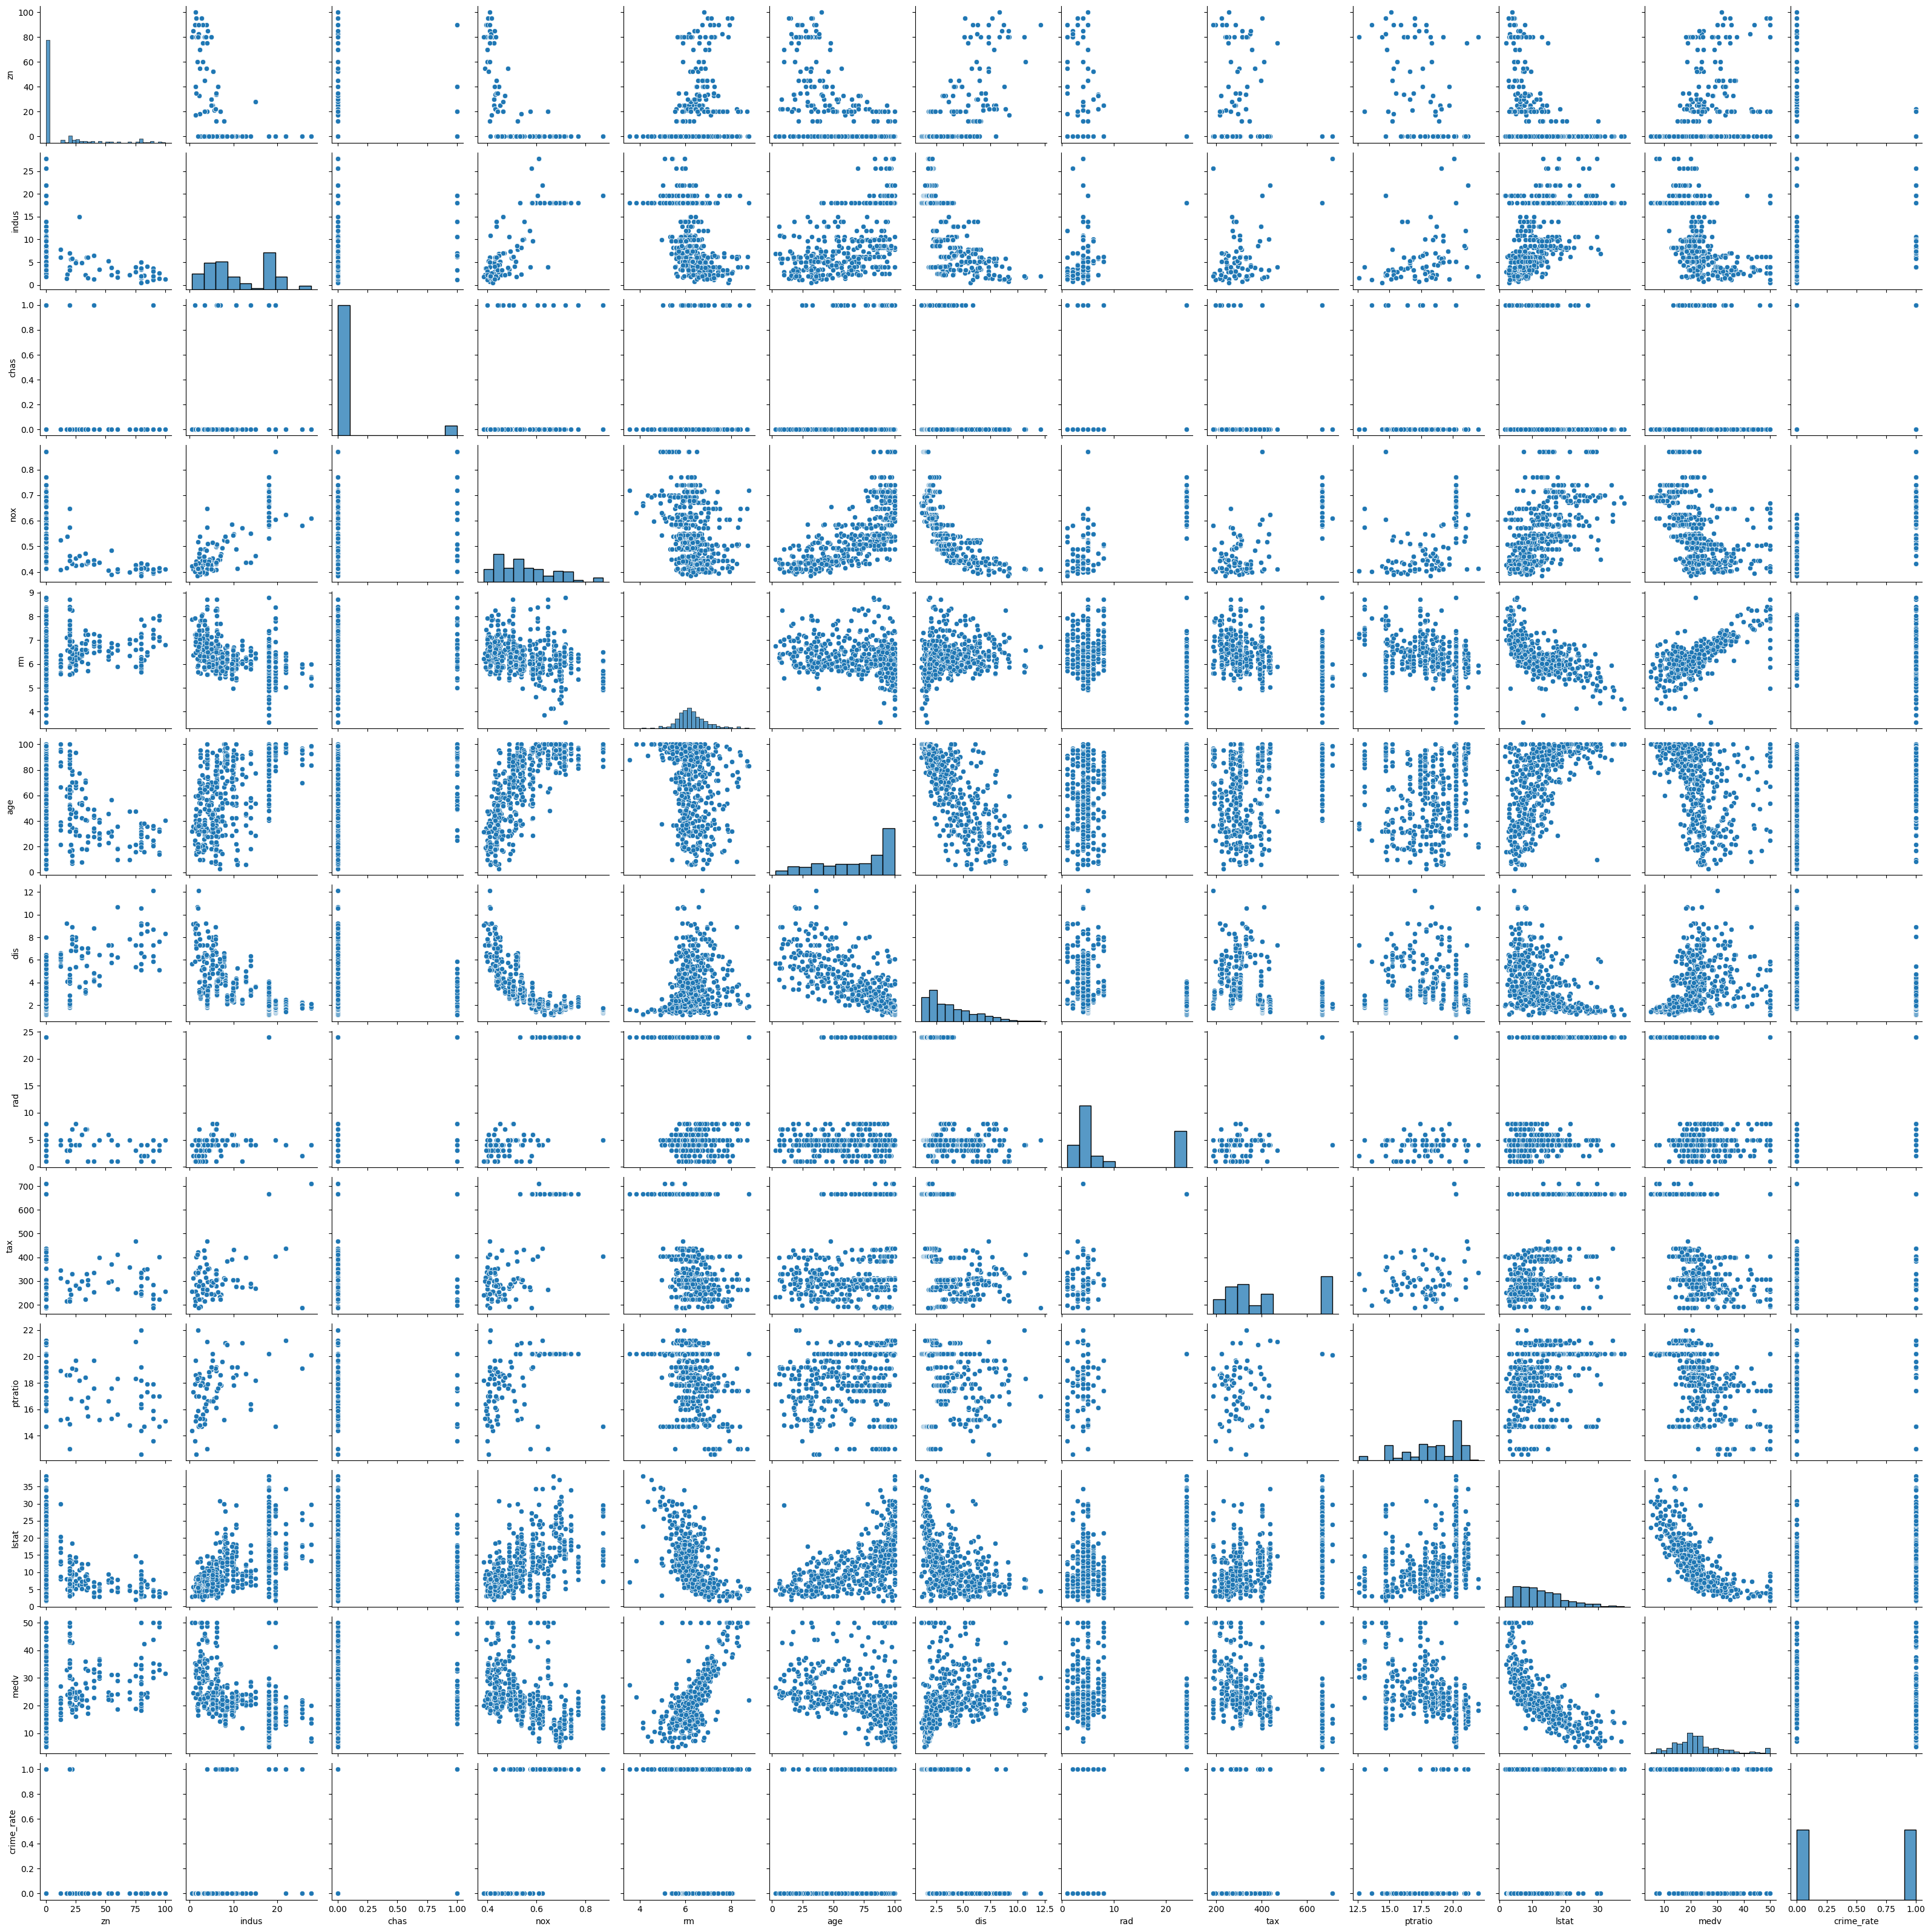

In [306]:
sns.pairplot(Boston);

In [312]:
Boston.corr()

zn     indus      chas       nox        rm       age  \
zn          1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus      -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas       -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox        -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm          0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age        -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis         0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad        -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax        -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio    -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
lstat      -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
medv        0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   
crime_rate -0.436151  0.603260  0.070097  0.723235 -0.156372  0.613940   

                 dis       rad       tax   ptratio     lstat      medv  \
zn          0.664408 -0.311948 -0.314563 -0.391679 -0.412995  0.360445   
indus      -0.708027  0.595129  0.720760  0.383248  0.603800 -0.483725   
chas       -0.099176 -0.007368 -0.035587 -0.121515 -0.053929  0.175260   
nox        -0.769230  0.611441  0.668023  0.188933  0.590879 -0.427321   
rm          0.205246 -0.209847 -0.292048 -0.355501 -0.613808  0.695360   
age        -0.747881  0.456022  0.506456  0.261515  0.602339 -0.376955   
dis         1.000000 -0.494588 -0.534432 -0.232471 -0.496996  0.249929   
rad        -0.494588  1.000000  0.910228  0.464741  0.488676 -0.381626   
tax        -0.534432  0.910228  1.000000  0.460853  0.543993 -0.468536   
ptratio    -0.232471  0.464741  0.460853  1.000000  0.374044 -0.507787   
lstat      -0.496996  0.488676  0.543993  0.374044  1.000000 -0.737663   
medv        0.249929 -0.381626 -0.468536 -0.507787 -0.737663  1.000000   
crime_rate -0.616342  0.619786  0.608741  0.253568  0.453263 -0.263017   

            crime_rate  
zn           -0.436151  
indus         0.603260  
chas          0.070097  
nox           0.723235  
rm           -0.156372  
age           0.613940  
dis          -0.616342  
rad           0.619786  
tax           0.608741  
ptratio       0.253568  
lstat         0.453263  
medv         -0.263017  
crime_rate    1.000000

In [313]:
idx=['indus','nox','age','dis','rad','tax']
X_train,X_test,y_train,y_test=train_test_split(Boston[idx],Boston["crime_rate"],test_size=0.3)
X_train.shape

(354, 6)

In [314]:
log_reg=LogisticRegression(C=1e30,solver='liblinear')
log_reg.fit(X_train,y_train)
print(log_reg.classes_,log_reg.coef_,log_reg.intercept_)
print("Overall fraction of correct predictions (Logistic Regression) =",log_reg.score(X_test,y_test))
print(f"Test Error Rate for Logistic Regression = {round(1-log_reg.score(X_test,y_test),2)}")
print(f"accuracy score = {accuracy_score(y_test,log_reg.predict(X_test))}")
confusion_table(log_reg.predict(X_test),y_test)

[0 1] [[-9.84473506e-03  2.70935092e+01  2.91520110e-02  2.57404337e-02
   5.38673923e-01 -6.84417025e-03]] [-17.2539456]
Overall fraction of correct predictions (Logistic Regression) = 0.8355263157894737
Test Error Rate for Logistic Regression = 0.16
accuracy score = 0.8355263157894737


Truth       0   1
Predicted        
0          68  14
1          11  59

In [315]:
lda=LDA()
lda.fit(X_train,y_train)
print(lda.classes_,lda.coef_,lda.intercept_)
print("Overall fraction of correct predictions (lda) =",lda.score(X_test,y_test))
print(f"Test Error Rate for LDA = {round(1-lda.score(X_test,y_test),2)}")
print(f"accuracy score = {accuracy_score(y_test,lda.predict(X_test))}")
confusion_table(lda.predict(X_test),y_test)

[0 1] [[ 3.64543543e-02  1.63210725e+01  4.18631954e-02 -1.23262492e-01
   2.01418930e-01 -3.63894084e-03]] [-12.19740979]
Overall fraction of correct predictions (lda) = 0.8157894736842105
Test Error Rate for LDA = 0.18
accuracy score = 0.8157894736842105


Truth       0   1
Predicted        
0          69  18
1          10  55

In [316]:
qda=QDA()
qda.fit(X_train,y_train)
print(qda.classes_)#,qda.coef_,qda.intercept_)
print("Overall fraction of correct predictions (qda) =",qda.score(X_test,y_test))
print(f"Test Error Rate for QDA = {round(1-qda.score(X_test,y_test),2)}")
print(f"accuracy score = {accuracy_score(y_test,qda.predict(X_test))}")
confusion_table(qda.predict(X_test),y_test)

[0 1]
Overall fraction of correct predictions (qda) = 0.8947368421052632
Test Error Rate for QDA = 0.11
accuracy score = 0.8947368421052632


Truth       0   1
Predicted        
0          76  13
1           3  60

In [317]:
NB=GaussianNB()
NB.fit(X_train,y_train)
print(NB.classes_)#,qda.coef_,qda.intercept_)
print("Overall fraction of correct predictions (NB) =",NB.score(X_test,y_test))
print(f"Test Error Rate for NB = {round(1-NB.score(X_test,y_test),2)}")
print(f"accuracy score = {accuracy_score(y_test,NB.predict(X_test))}")
confusion_table(NB.predict(X_test),y_test)

[0 1]
Overall fraction of correct predictions (NB) = 0.8092105263157895
Test Error Rate for NB = 0.19
accuracy score = 0.8092105263157895


Truth       0   1
Predicted        
0          69  19
1          10  54

In [319]:
for n in range(1,10):
    knn_n=KNeighborsClassifier(n_neighbors=n)
    knn_n.fit(X_train,y_train)
    print(f"Overall fraction of correct predictions (knn_{n}) = {round(knn_n.score(X_test,y_test),2)}")
    print(f"test Error Rate for (knn_{n}) = {round(1-knn_n.score(X_test,y_test),2)}")
    print(confusion_table(knn_n.predict(X_test),y_test))

Overall fraction of correct predictions (knn_1) = 0.91
test Error Rate for (knn_1) = 0.09
Truth       0   1
Predicted        
0          71   6
1           8  67
Overall fraction of correct predictions (knn_2) = 0.92
test Error Rate for (knn_2) = 0.08
Truth       0   1
Predicted        
0          75   8
1           4  65
Overall fraction of correct predictions (knn_3) = 0.89
test Error Rate for (knn_3) = 0.11
Truth       0   1
Predicted        
0          70   8
1           9  65
Overall fraction of correct predictions (knn_4) = 0.9
test Error Rate for (knn_4) = 0.1
Truth       0   1
Predicted        
0          73   9
1           6  64
Overall fraction of correct predictions (knn_5) = 0.89
test Error Rate for (knn_5) = 0.11
Truth       0   1
Predicted        
0          72   9
1           7  64
Overall fraction of correct predictions (knn_6) = 0.9
test Error Rate for (knn_6) = 0.1
Truth       0   1
Predicted        
0          73   9
1           6  64
Overall fraction of correct pred